In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df =dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

In [4]:
df_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [7]:
df_us = df_us.dropna(subset=['salary_year_avg'])

In [8]:
df_us_explode =df_us.explode('job_skills')

In [13]:
df_f = df_us_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

In [14]:
df_f

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [16]:
job_count = len(df_us)
job_count

4350

In [17]:
df_f['skill_percent'] = df_f['count']/job_count *100
df_f

,count,median,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [20]:
skill_percent =5

df_f = df_f[df_f['skill_percent']> skill_percent]
df_f

,count,median,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [24]:
from adjustText import adjust_text


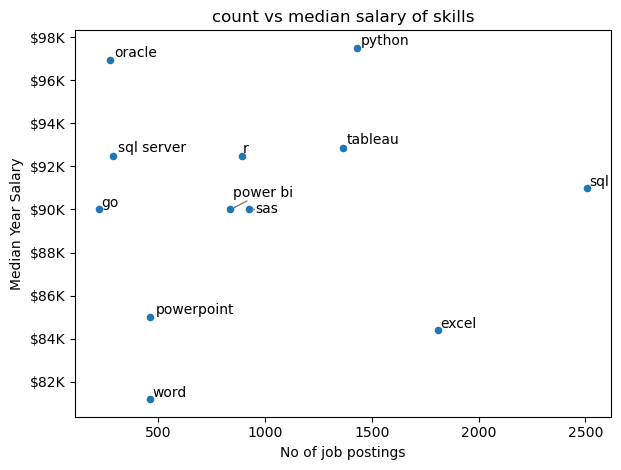

In [26]:
df_f.plot(kind= 'scatter',x='count',y='median')
text=[]
for i,n in enumerate(df_f.index):
       text.append(plt.text(df_f['count'].iloc[i],df_f['median'].iloc[i],n))

adjust_text(text,arrowprops=dict(arrowstyle='->',color='gray'))
plt.title('count vs median salary of skills')
plt.xlabel('No of job postings')
plt.ylabel('Median Year Salary')
plt.tight_layout()
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _:f'${int(y/1000)}K'))

In [27]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'sharepoint',
  'word',
  'datarobot',
  'qlik',
  'msaccess',
  'spreadsheet',
  'power bi',
  'spss',
  'sheets',
  'ssis',
  'nuix',
  'sap',
  'ssrs',
  'powerbi',
  'visio',
  'excel',
  'splunk',
  'looker',
  'tableau',
  'alteryx',
  'powerpoint',
  'microstrategy',
  'ms access',
  'cognos',
  'dax',
  'esquisse',
  'sas'],
 'programming': ['go',
  'scala',
  'sass',
  'no-sql',
  't-sql',
  'vba',
  'python',
  'rust',
  'delphi',
  'ruby',
  'sas',
  'golang',
  'visual basic',
  'powershell',
  'mongo',
  'html',
  'clojure',
  'javascript',
  'erlang',
  'apl',
  'objective-c',
  'mongodb',
  'swift',
  'css',
  'kotlin',
  'dart',
  'haskell',
  'nosql',
  'c',
  'crystal',
  'elixir',
  'shell',
  'typescript',
  'f#',
  'c++',
  'lua',
  'lisp',
  'julia',
  'perl',
  'vb.net',
  'pascal',
  'groovy',
  'r',
  'fortran',
  'sql',
  'c#',
  'java',
  'solidity',
  'cobol',
  'bash',
  'visualbasic',
  'ocaml',
  'assembly',
  'php',
  'mat

In [28]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,sharepoint
0,analyst_tools,word
0,analyst_tools,datarobot
0,analyst_tools,qlik
...,...,...
9,sync,symphony
9,sync,google chat
9,sync,unify
9,sync,ringcentral


In [29]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_f.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,count,median,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


In [31]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > 5]


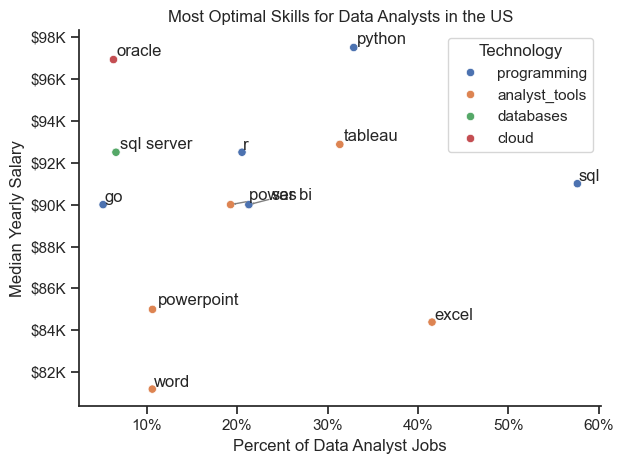

In [38]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_f.index):
    texts.append(plt.text(df_f['skill_percent'].iloc[i], df_f['median'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()